# Encapsulamiento en Programación Orientada a Objetos

Bienvenido/a. En esta lección aprenderás el principio de encapsulamiento, esencial para proteger y organizar los datos en tus programas orientados a objetos.

## Objetivos
- Comprender qué es el encapsulamiento y su importancia en POO.
- Aplicar el control de acceso a los atributos y métodos de una clase.
- Relacionar el encapsulamiento con ejemplos de la vida real.

---

**Ejemplo de la vida real:** Piensa en una cuenta bancaria: solo puedes interactuar con ella a través de un cajero o una app, pero no puedes acceder directamente al sistema interno del banco. Eso es encapsulamiento.

# Encapsulamiento en Programación Orientada a Objetos

El encapsulamiento es uno de los principios fundamentales de la Programación Orientada a Objetos. Se refiere a la agrupación de datos y los métodos que operan sobre esos datos dentro de una unidad o clase. Además, implica la restricción del acceso directo a algunos de los componentes del objeto.

## Explicación
El encapsulamiento permite:

1. **Ocultar la implementación interna**: Los detalles de cómo se implementa una clase se mantienen ocultos del mundo exterior.

2. **Control de acceso**: Se puede controlar cómo y qué partes del objeto son accesibles desde fuera de la clase.

3. **Flexibilidad y mantenibilidad**: Permite cambiar la implementación interna sin afectar el código que usa la clase.

4. **Integridad de datos**: Ayuda a mantener los datos en un estado consistente al restringir el acceso directo.

## Ejemplo práctico

En este ejemplo:

1. `CuentaBancaria` encapsula los datos (`__titular` y `__saldo`) y los métodos que operan sobre ellos.

2. Los atributos `__titular` y `__saldo` son privados (indicado por el doble guion bajo).

3. Se proporcionan métodos públicos (`depositar`, `retirar`, `obtener_saldo`, `obtener_titular`) para interactuar con los datos privados.

4. Los métodos `depositar` y `retirar` incluyen lógica para mantener la integridad de los datos.

5. El acceso directo a `__saldo` desde fuera de la clase resulta en un error.

In [ ]:
@startuml
class CuentaBancaria {
    - titular: str
    - saldo: float
    + depositar(cantidad): bool
    + retirar(cantidad): bool
    + obtener_saldo(): float
    + obtener_titular(): str
}
@enduml

https://editor.plantuml.com/uml/TOun2iCm34Ltdq9ZGka5F8Ns84MnLJ2eLf7agVJkTO8xPCWV_uF7MynHlRqu94Opk3UgZZUi2RKWV0BqNS6BDqQDOAxZCkGi4PuiwFjrWKnliTA5KyBg9MEU8wmYFBYI5psbiZfLqiSkdkQZ-Wz7o8Qtb6zOgEQU_mC0

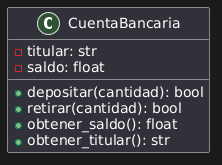

In [1]:
class CuentaBancaria:
    def __init__(self, titular: str, saldo_inicial: float) -> None:
        self.__titular: str = titular
        self.__saldo: float = saldo_inicial

    def depositar(self, cantidad: float) -> bool:
        if cantidad > 0:
            self.__saldo += cantidad
            return True
        return False

    def retirar(self, cantidad: float) -> bool:
        if 0 < cantidad <= self.__saldo:
            self.__saldo -= cantidad
            return True
        return False

    def obtener_saldo(self) -> float:
        return self.__saldo

    def obtener_titular(self) -> str:
        return self.__titular

In [2]:
cuenta = CuentaBancaria(titular="Juan Pérez", saldo_inicial=1000)
print(f"Saldo inicial: {cuenta.obtener_saldo()}")

cuenta.depositar(500)
print(f"Saldo después del depósito: {cuenta.obtener_saldo()}")

cuenta.retirar(200)
print(f"Saldo después del retiro: {cuenta.obtener_saldo()}")


Saldo inicial: 1000
Saldo después del depósito: 1500
Saldo después del retiro: 1300


In [3]:
# Intentando acceder directamente a los atributos privados
try:
    print(cuenta.__saldo)
except AttributeError as e:
    print(f"Error: {e}")

# Accediendo a los atributos privados usando name mangling
print(cuenta._CuentaBancaria__saldo)
print(cuenta._CuentaBancaria__titular)

Error: 'CuentaBancaria' object has no attribute '__saldo'
1300
Juan Pérez


In [4]:
# Accediendo a los atributos privados usando name mangling
print(cuenta._CuentaBancaria__saldo)
print(cuenta._CuentaBancaria__titular)

# Listado de métodos y atributos de la clase
print(dir(cuenta))

1300
Juan Pérez
['_CuentaBancaria__saldo', '_CuentaBancaria__titular', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'depositar', 'obtener_saldo', 'obtener_titular', 'retirar']


## Características del encapsulamiento en Python

Python utiliza una forma de encapsulamiento basada en convenciones, conocida como "name mangling":

- Los atributos con doble guion bajo (`__`) al principio se "manglan" para dificultar el acceso desde fuera de la clase.

- Esto no es una restricción estricta, sino una convención que dificulta el acceso accidental.

- Se puede acceder a estos atributos usando `_NombreClase__atributo`, aunque no se recomienda.

## Beneficios del encapsulamiento en este ejemplo

1. **Protección de datos**: El saldo no puede ser modificado directamente, solo a través de métodos controlados.

2. **Validación de datos**: Los métodos `depositar` y `retirar` aseguran que las operaciones sean válidas.

3. **Abstracción**: Los usuarios de la clase no necesitan conocer cómo se almacena o maneja internamente el saldo.

4. **Flexibilidad**: La implementación interna puede cambiar sin afectar el código que usa la clase.

## Conclusión

El encapsulamiento es una herramienta poderosa en la POO que permite crear código más robusto, mantenible y seguro. Ofrece varias ventajas:

- **Seguridad de datos**: Protege los datos de accesos y modificaciones no autorizados.

- **Modularidad**: Facilita el desarrollo y mantenimiento de código al separar la interfaz de la implementación.

- **Flexibilidad**: Permite cambiar la implementación interna sin afectar el código externo.

- **Abstracción**: Simplifica el uso de la clase al ocultar detalles innecesarios.

Sin embargo, es importante recordar que en Python, el encapsulamiento es más una convención que una restricción estricta. Los desarrolladores deben respetar estas convenciones para aprovechar plenamente los beneficios del encapsulamiento.

En el desarrollo de software moderno, el encapsulamiento se utiliza ampliamente para crear APIs limpias y robustas, mejorar la seguridad de los datos y facilitar el mantenimiento del código a largo plazo. Dominar el concepto de encapsulamiento es esencial para cualquier desarrollador que trabaje con programación orientada a objetos, ya que permite crear sistemas más organizados, seguros y fáciles de mantener.

## Ejercicios prácticos y preguntas de reflexión

1. Crea una clase `CajaFuerte` con un atributo privado `__codigo` y métodos para guardar y extraer objetos solo si el código es correcto.

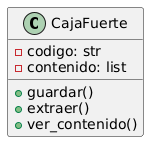

In [ ]:
class CajaFuerte:
    def __init__(self, codigo: str) -> None:
        self.__codigo: str = codigo
        self.__contenido: list = []

    def guardar(self, objeto: str, codigo: str) -> bool:
        if codigo == self.__codigo:
            self.__contenido.append(objeto)
            return True
        return False

    def extraer(self, objeto: str, codigo: str) -> bool:
        if codigo == self.__codigo and objeto in self.__contenido:
            self.__contenido.remove(objeto)
            return True
        return False

    def ver_contenido(self, codigo: str) -> list:
        if codigo == self.__codigo:
            return self.__contenido
        return []

2. Modifica la clase `CuentaBancaria` para agregar un método que permita cambiar el titular solo si se proporciona una contraseña correcta.

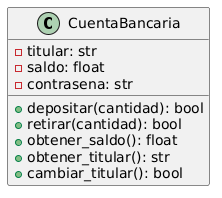

In [ ]:
class CuentaBancaria:
    def __init__(self, titular: str, saldo_inicial: float, contrasena: str) -> None:
        self.__titular: str = titular
        self.__saldo: float = saldo_inicial
        self.__contrasena: str = contrasena

    def depositar(self, cantidad: float) -> bool:
        if cantidad > 0:
            self.__saldo += cantidad
            return True
        return False

    def retirar(self, cantidad: float) -> bool:
        if 0 < cantidad <= self.__saldo:
            self.__saldo -= cantidad
            return True
        return False

    def obtener_saldo(self) -> float:
        return self.__saldo

    def obtener_titular(self) -> str:
        return self.__titular

    def cambiar_titular(self, nuevo_titular: str, contrasena: str) -> bool:
        if contrasena == self.__contrasena:
            self.__titular = nuevo_titular
            return True
        return False


3. ¿Por qué es importante restringir el acceso directo a los atributos de una clase?

Restringir el acceso directo a los atributos de una clase es importante por varias razones:
1. Protección de datos: Evita que los atributos sean modificados de manera inadvertida o malintencionada desde fuera de la clase.
2. Control de acceso: Permite definir reglas y validaciones para la modificación de los atributos, asegurando que solo se realicen cambios válidos.
3. Mantenimiento de la integridad: Ayuda a mantener la consistencia interna de la clase, evitando estados inválidos.
4. Encapsulamiento: Fomenta el principio de encapsulamiento en la programación orientada a objetos, mejorando la modularidad y la mantenibilidad del código.

### Autoevaluación
1. ¿Qué ventajas aporta el encapsulamiento al desarrollo de software?
- Permite proteger los datos y asegurar que solo se acceda a ellos de manera controlada.
- Facilita el mantenimiento y la evolución del código al reducir las dependencias entre componentes.

2. ¿Puedes dar un ejemplo de encapsulamiento en tu vida diaria?

Un ejemplo común de encapsulamiento en la vida diaria es el uso de una cuenta bancaria. Los detalles de la cuenta, como el saldo y la información personal del titular, están protegidos y solo pueden ser accedidos o modificados a través de métodos específicos proporcionados por el banco, como depositar dinero, retirar fondos o cambiar la información del titular, siempre que se proporcione la contraseña correcta.


## Referencias y recursos
- [Documentación oficial de Python: clases y encapsulamiento](https://docs.python.org/es/3/tutorial/classes.html)
- [Encapsulamiento en Python - W3Schools](https://www.w3schools.com/python/python_classes.asp)
- [Visualizador de objetos Python Tutor](https://pythontutor.com/)